# Reading and Understanding the Data

In [1]:
##IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
bike = pd.read_csv('day.csv')

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Checking missing values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

It is observed that, there is no null value.

In [7]:
#from the given data we can see that instant is an index column and dteday is an redundant column so we drop it
bike.drop(['instant','dteday'], axis = 1, inplace = True)

In [8]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
#Mapping variables season, month, weathersit, weekday

bike['season']=bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike['mnth']=bike.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike['weathersit']=bike.weathersit.map({1: 'Clear+Partly cloudy',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Wed,1,Clear+Partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Thu,1,Clear+Partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Fri,1,Clear+Partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,spring,0,Jan,0,Sat,0,Clear+Partly cloudy,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,spring,0,Jan,0,Sun,0,Mist + Cloudy,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,spring,0,Jan,0,Mon,1,Mist + Cloudy,6.765000,8.11270,53.5833,17.875868,68,891,959
8,spring,0,Jan,0,Tue,1,Clear+Partly cloudy,5.671653,5.80875,43.4167,24.250650,54,768,822
9,spring,0,Jan,0,Wed,1,Clear+Partly cloudy,6.184153,7.54440,48.2917,14.958889,41,1280,1321


# Data Visualisation

In [10]:

bike.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
dtype: int64

### Visualising Numeric Variables

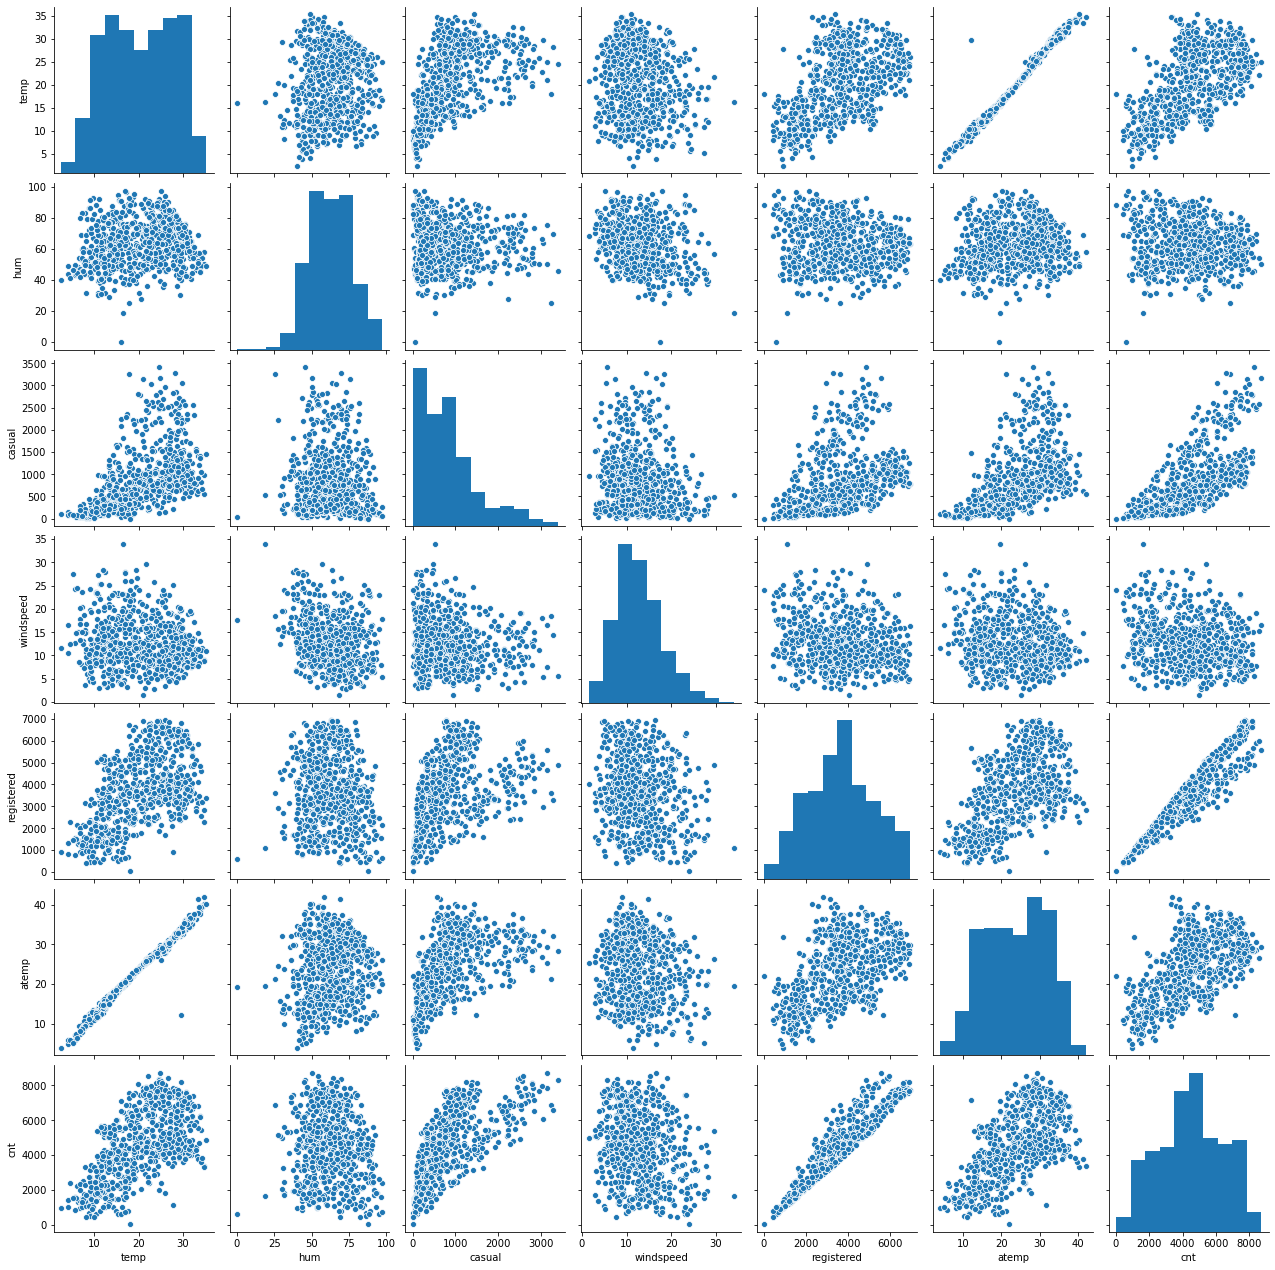

In [11]:
#Pairplot for numeric variables
sns.pairplot(bike, vars=['temp','hum','casual','windspeed','registered','atemp','cnt'])
plt.show()

By analysing all the plots above, we can see that:
    1.Renting of Bike is showing almost similar positive relation with temperature and atemp.
    2.All other variables are also showing positive relation with cnt.
    

### Visualising Categorical Variables

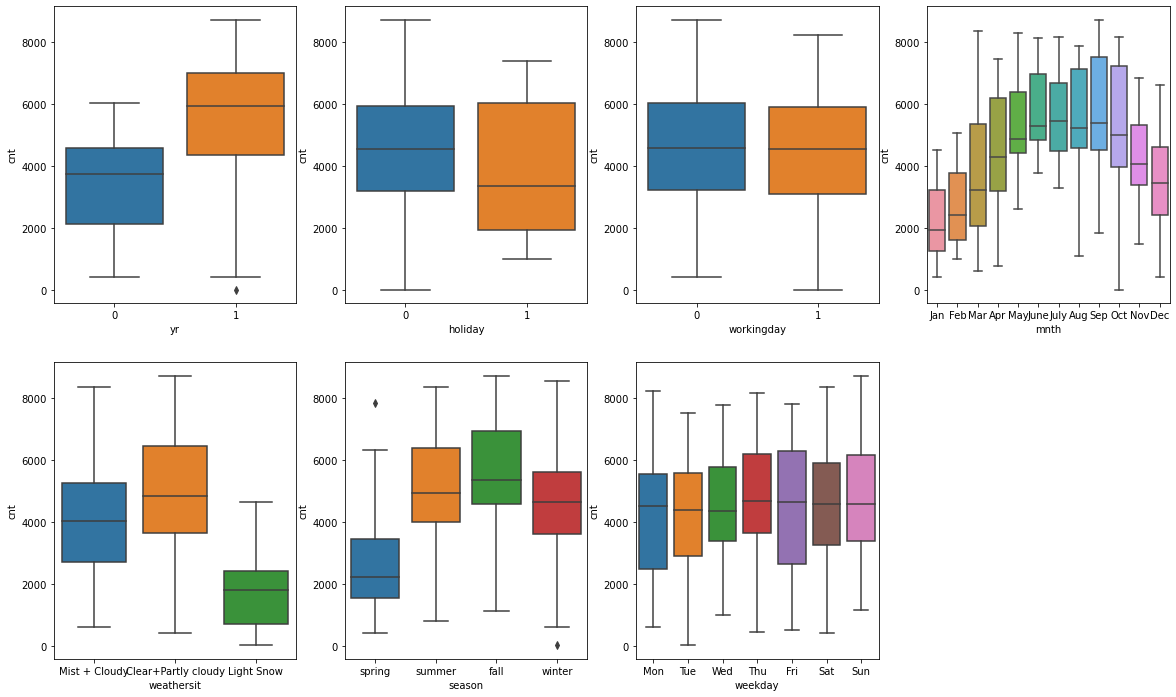

In [12]:
##Relationship between categorical and continuous variable
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.show()


The plots above shows the relationship between categorical variables and a Target variable i.e 'cnt'.

1.Rentals are more in the year 2019 compared to 2018.

2.Holiday and working days doesn't  varies much but the median of the non-holiday days is higher.

3.Rentals are more during the Fall season and than in summer.

4.Rentals are more in partly cloudy weather.

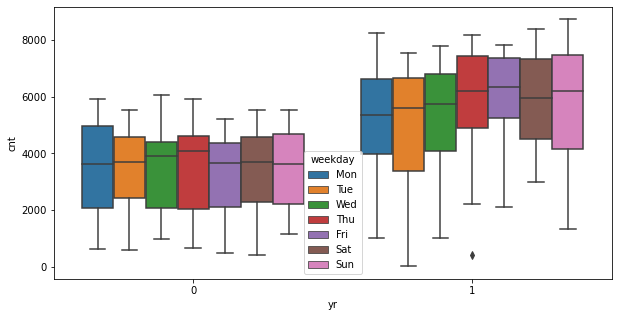

In [13]:
#Plotting yr with weekday against count
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'yr', y = 'cnt', hue = 'weekday', data = bike)
plt.show()

This shows in both the years 2018 and 2019 the weekdays didn't show any big changes in the demand, rather this shows a steady demand.

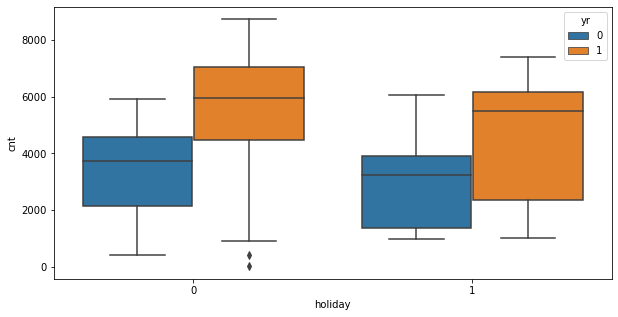

In [14]:
#Plotting year with holiday against rental
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'holiday', y = 'cnt', hue = 'yr', data = bike)
plt.show()

This Plot shows that 75% of rentals for 2019 holidays are higher in comparision to 2018 holidays.

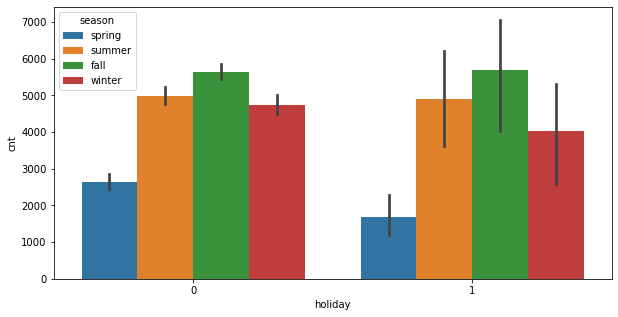

In [15]:
#Plot of Holidays with season against count of rentals
plt.figure(figsize = (10, 5))
sns.barplot(x = 'holiday', y = 'cnt', hue = 'season', data = bike)
plt.show()

This shows that the fall season of both years show higher demand of bike rent.

# Let's understand the variables better

### weathersit

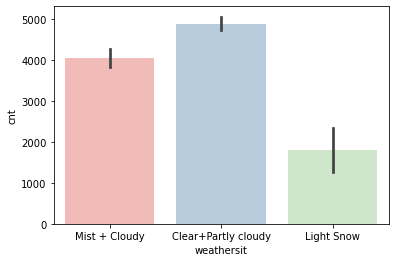

In [16]:
#Relation between weather and count of bike rentals
sns.barplot('weathersit','cnt',palette="Pastel1",data=bike)
plt.show()

The rentals are high for clear/Partly cloudy weathersituation.

### Season

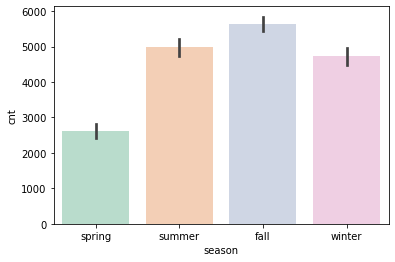

In [17]:
#Barplot to see relation between season and count of bike rentals
sns.barplot('season','cnt',data=bike,palette="Pastel2",)
plt.show()

The rentals are high for fall season and summer season also show high demand.

### Month

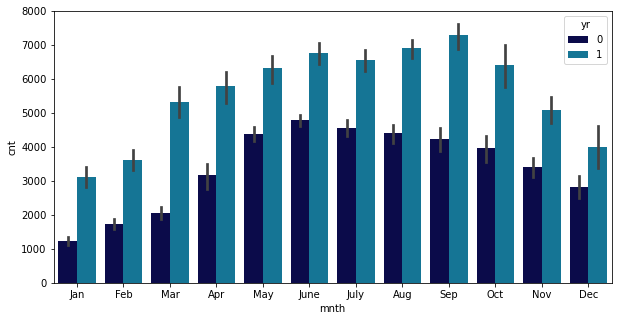

In [18]:
#Relation between month and count of bike rentals with different year
plt.figure(figsize=(10,5))
sns.barplot('mnth','cnt',hue='yr',data=bike,palette='ocean')
plt.show()

Rentals are more in the year sep 2019 and june 2018. And rentals have significant increase in the year 2019.

Rentals shows a trend rise in the mid of years.

### weekday

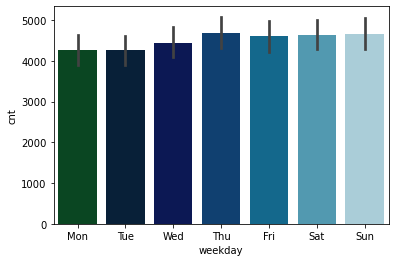

In [19]:
#Relation between Weekdays and count of bike rentals
sns.barplot('weekday','cnt',data=bike, palette='ocean')
plt.show()

Doesn't show much of any relational variation rather it shows a steady growth in demand of bikes.

### Temperature

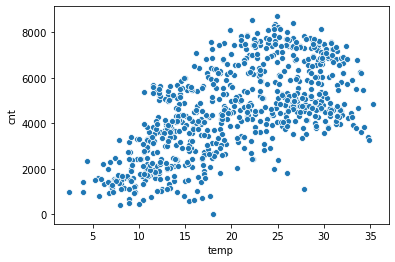

In [20]:
#scatter plot for temperature to count
sns.scatterplot(x='temp',y='cnt' ,data=bike)
plt.show()

With rise in temperature the rental of bike seems to be increasing. 

### Humidity

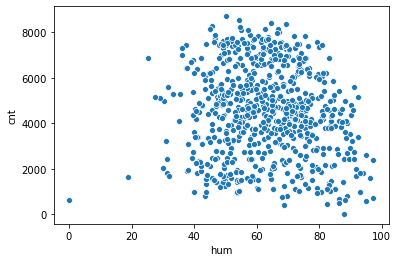

In [21]:
sns.scatterplot(x='hum', y='cnt',data=bike)
plt.show()

 Rentals more at high humidity as it shows positive correlation. And the points are more clustered at the higher side of humidity.

### Finding correlation

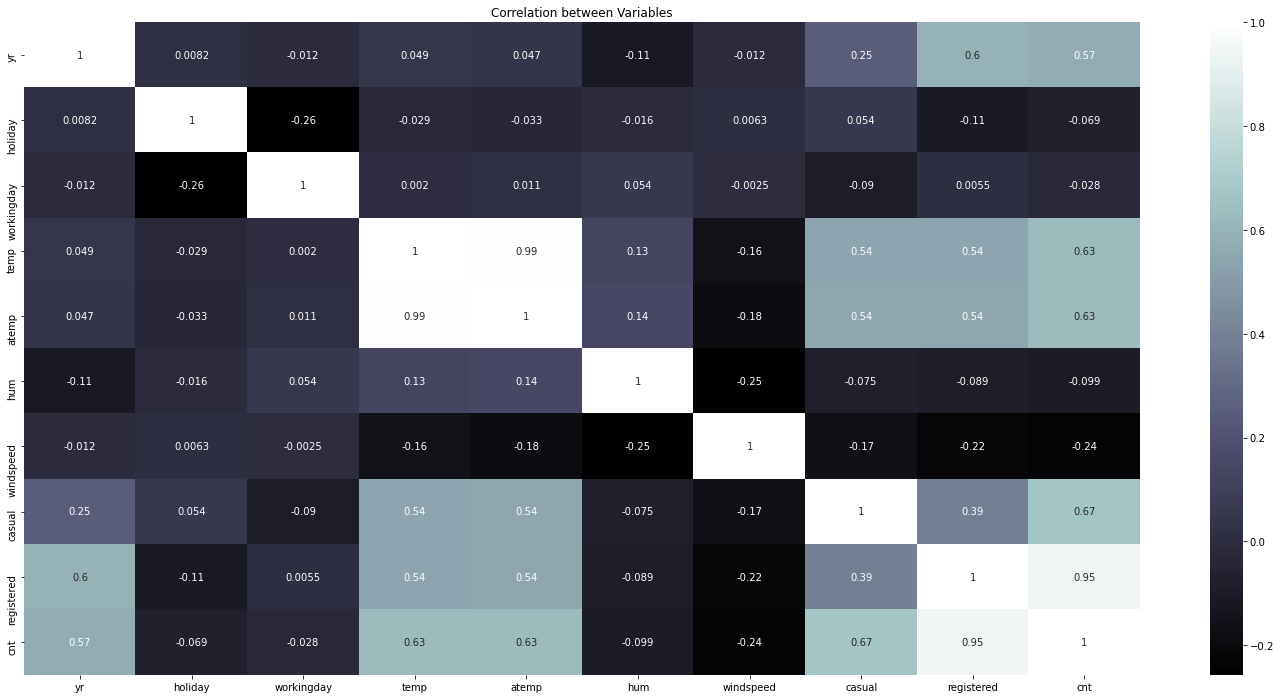

In [22]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(bike.corr(), cmap='bone', annot = True)
plt.title("Correlation between Variables")
plt.show()

As is visible from the pairplot and the heatmap, we can see temp, atemp, casual,registered,instant variables are correlated to 'count' variable.

And some of the varible are showing multicolinearity like temp and atemp.

Both the plots above helps to interpret the data well and identify the variables that can turn out to be useful in building the model.

And since some of the variance are explained by the target variable linearly therefore we can consider a Linear Regression Model.

### Dropping the unnecessary/redundant variables from the dataset

We can see the dataset has some variables that are not required. We can drop atemp, casual, registered.

-we know atemp and temp showing high collinearity show we will drop one of the column.

-we know that casual+registered=cnt and cnt is our target variable so we will not consider casual and registered.

In [23]:
#drop unnecessary columns
bike=bike.drop(['casual', 'registered', 'atemp'], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear+Partly cloudy,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear+Partly cloudy,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear+Partly cloudy,9.305237,43.6957,12.522300,1600


In [24]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


# Data Preparation

### Creating Dummy variables for categorical variables

In [25]:
#Get the dummy variables for month, season, weathersit, weekday and Let's drop the first column from  using 'drop_first =True'
months = pd.get_dummies(bike.mnth,drop_first=True)
weekdays = pd.get_dummies(bike.weekday,drop_first=True)
weather_sit = pd.get_dummies(bike.weathersit,drop_first=True)
seasons = pd.get_dummies(bike.season,drop_first=True)


In [26]:
# Add the results to the original bike dataframe
bike = pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear+Partly cloudy,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Thu,1,Clear+Partly cloudy,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Fri,1,Clear+Partly cloudy,9.305237,43.6957,12.522300,1600


In [27]:
# Dropping 'season','mnth','weekday','weathersit' as we have created the dummies for it
bike.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


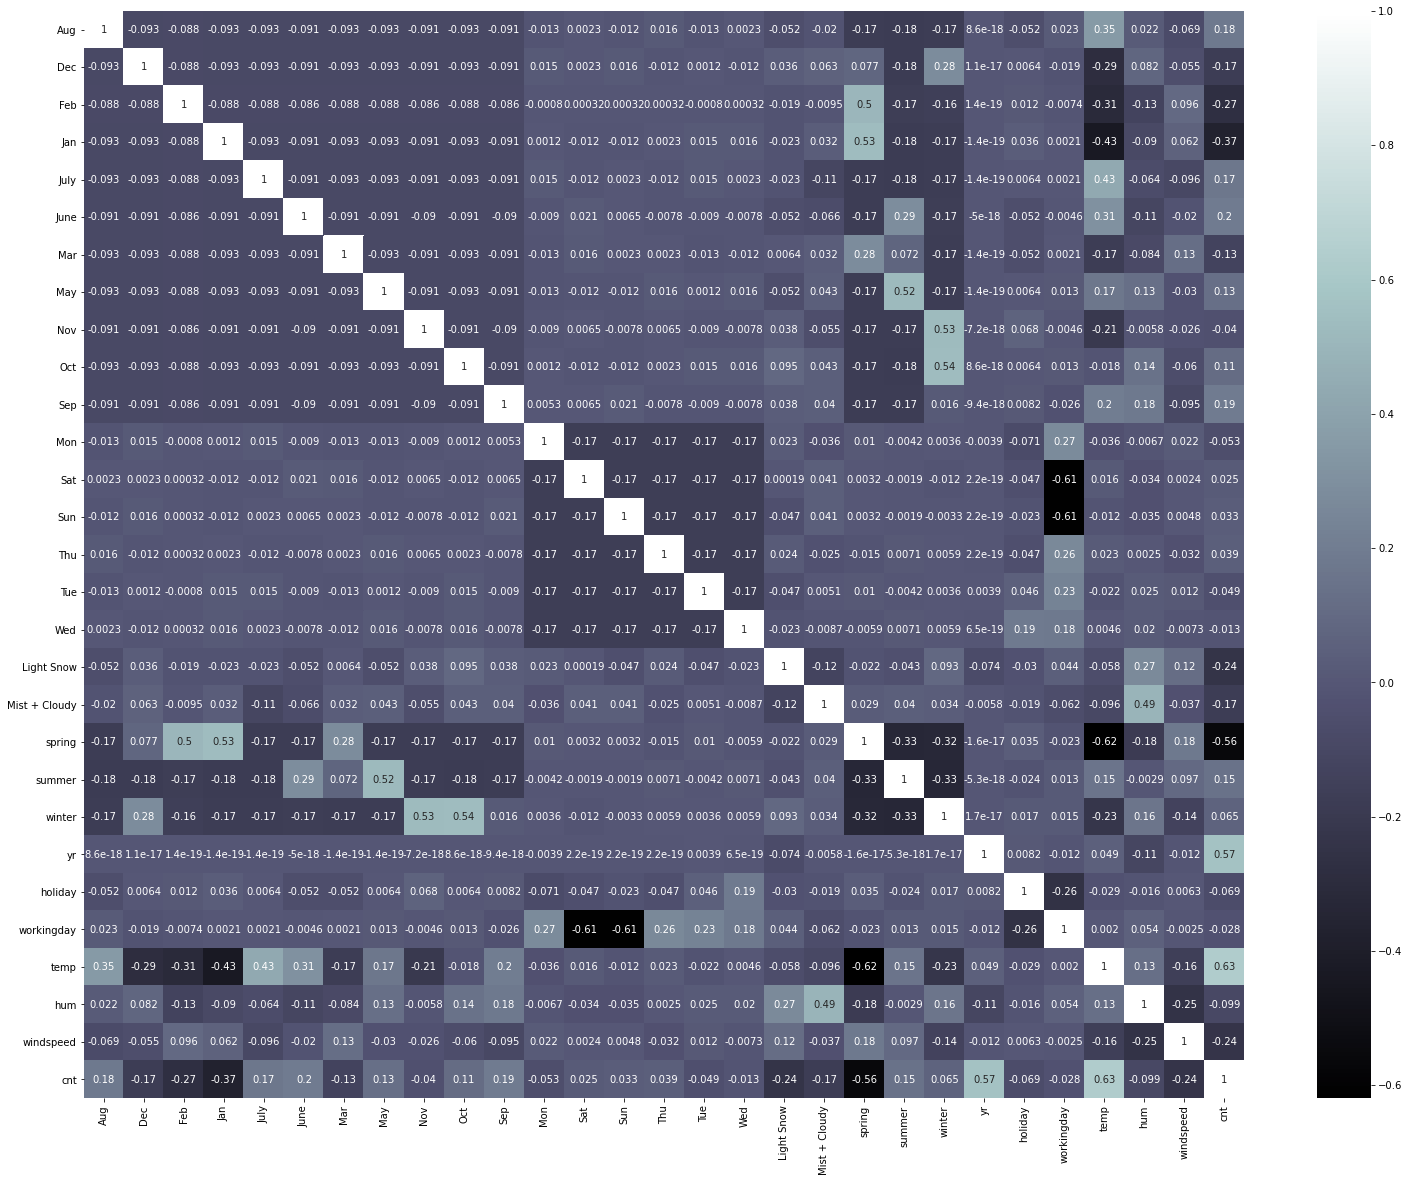

In [28]:
#Now lets check the correlation between variables again
#Heatmap to see correlation between variables
plt.figure(figsize=(26, 20))
sns.heatmap(bike.corr(), cmap='bone', annot = True)
plt.show()

In [29]:
bike.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


### Splitting the Data into Training and Testing Sets¶

As we know, the first basic step for regression is performing a train-test split.

In [30]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, random_state = 100)

In [31]:
#Rows and columns after split
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


### Rescaling the Features

It is extremely important to rescale the variables so that they have a comparable scale.
we will use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

we will use MinMax scaling

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','hum','windspeed','cnt']

#Fit on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0.345824,0.751824,0.380981,0.191095


In [34]:
#Verifying numeric variables(min and max) after scaling
bike_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.243137,0.247059,0.247059,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.429398,0.431725,0.431725,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


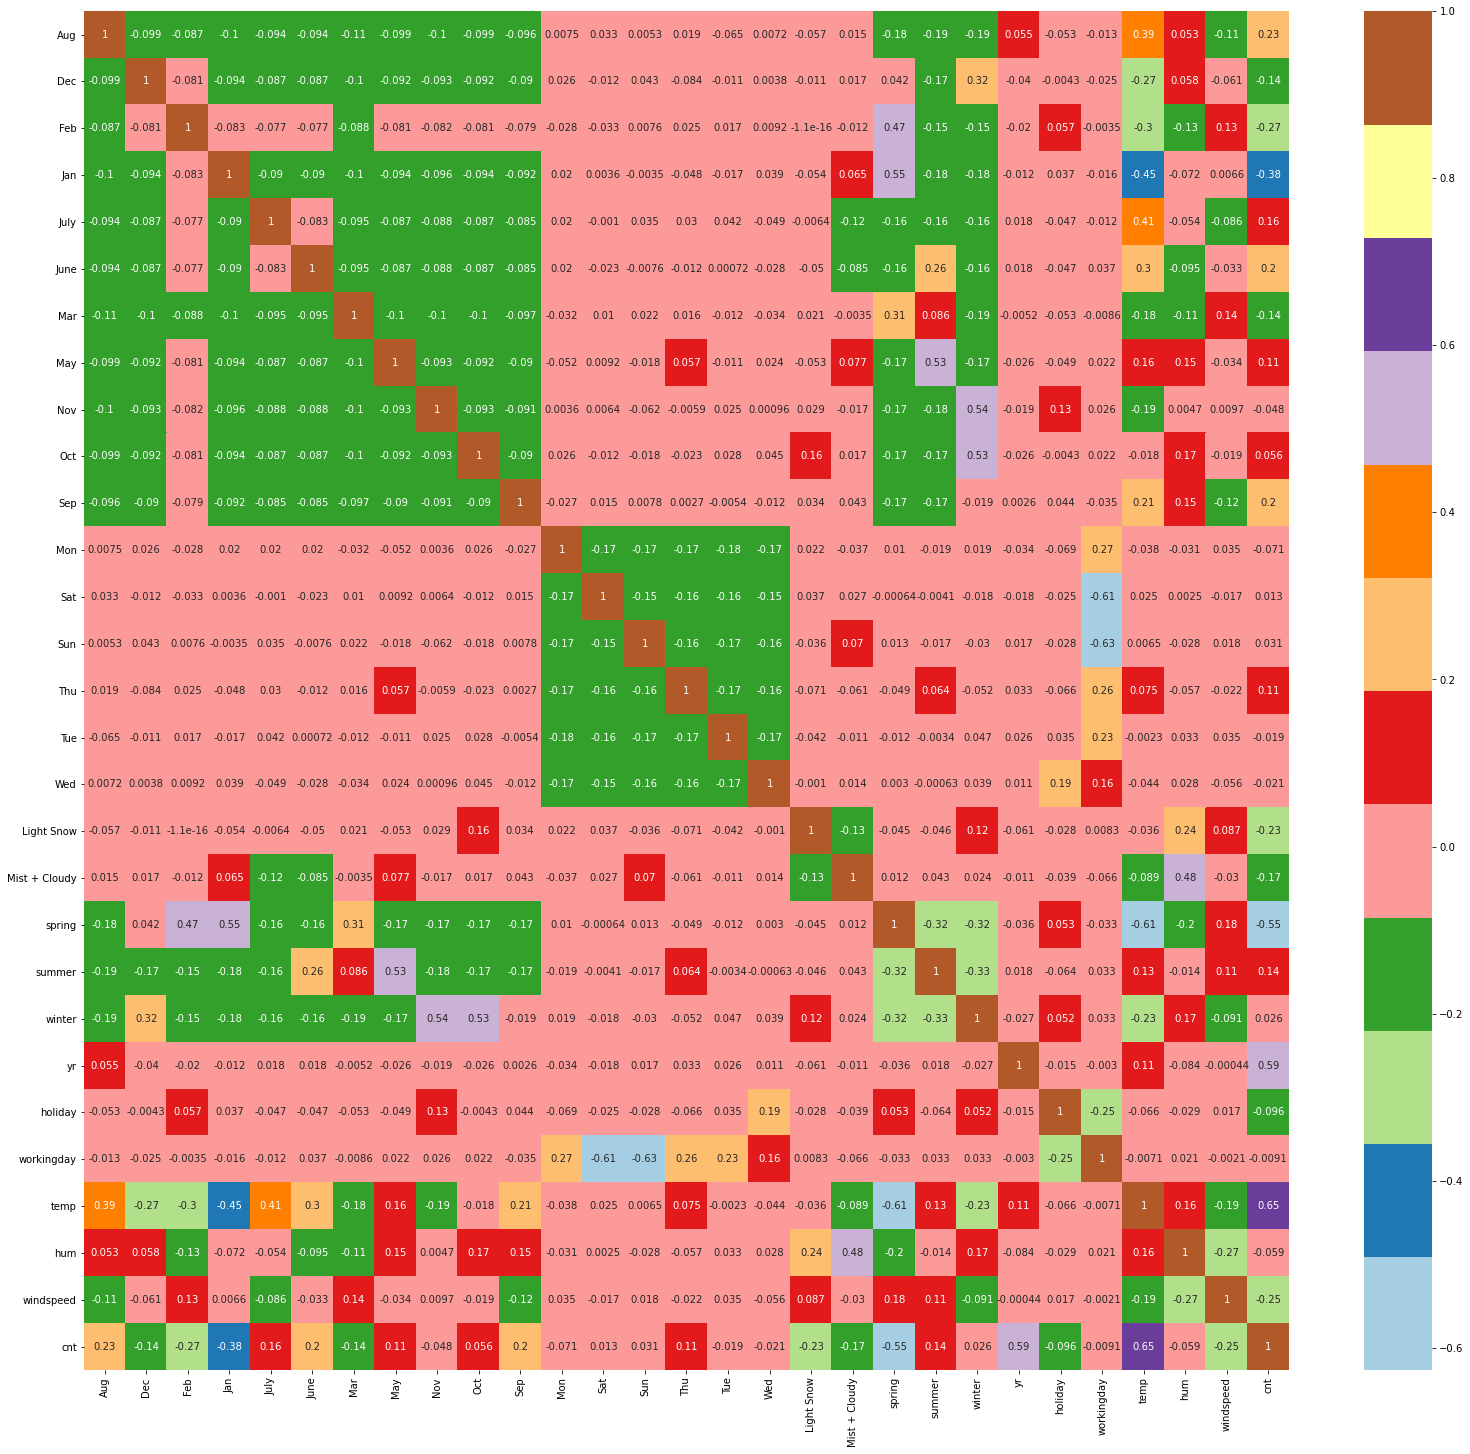

In [35]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling
#we will plot heatmap on the train set
plt.figure(figsize=(27, 25))
sns.heatmap(bike_train.corr(),cmap='Paired',annot = True)
plt.show()

From the heatmap we can see temp, year are correlated to the 'count' variable. Even in August, September months we can see the counts are little high.
and some of the variables like Jan,feb month, light snow, cloudy are showing negative correlation. 

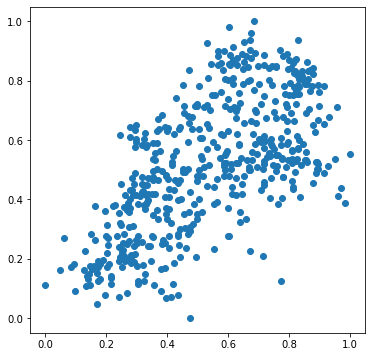

In [36]:
plt.figure(figsize=[6,6])
plt.scatter(bike_train.temp, bike_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [37]:
#Divide the data into X and y
y_train = bike_train.pop('cnt')
X_train = bike_train

# Building a linear model

we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

RFE
Recursive feature elimination

In [38]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [40]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [41]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter', 'yr', 'holiday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [42]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'workingday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [43]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [44]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [45]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [46]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          8.15e-189
Time:                        12:23:52   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3197      0.036      8.859

### Checking VIF

In [47]:
#Drop the constant term 
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [48]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,hum,30.89
12,temp,17.79
14,windspeed,4.72
7,spring,4.37
9,winter,4.06
8,summer,2.82
6,Mist + Cloudy,2.32
10,yr,2.09
3,Nov,1.85
1,Jan,1.75


In [49]:
#Drop December
X_train_new1 = X_train_rfe.drop(["Dec"], axis = 1)

Rebuilding the model without Dec

In [50]:
#Build a model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          4.41e-189
Time:                        12:23:53   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3032      0.035      8.598

In [51]:
#Drop the constant term 
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [52]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,hum,29.09
11,temp,16.80
13,windspeed,4.72
6,spring,4.37
8,winter,3.78
7,summer,2.80
5,Mist + Cloudy,2.29
9,yr,2.09
0,Jan,1.67
2,Nov,1.60


'humidity' variable can be dropped as its insignificant by looking at very high VIF

Rebuilding the model without 'humidity'¶

In [53]:
#Drop humidity
X_train_new2 = X_train_lm1.drop(["hum"], axis = 1)

In [54]:
#Build a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          5.93e-186
Time:                        12:23:53   Log-Likelihood:                 501.87
No. Observations:                 510   AIC:                            -975.7
Df Residuals:                     496   BIC:                            -916.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2208      0.031      7.190

In [55]:
#Drop the constant
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [56]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,5.15
12,windspeed,4.67
6,spring,2.76
8,winter,2.28
7,summer,2.24
9,yr,2.07
0,Jan,1.61
2,Nov,1.60
1,July,1.59
5,Mist + Cloudy,1.56


Nov variable seems to be insignificant, by looking at p value and low VIF. We can drop it

Rebuliding the model without Nov

In [57]:
#Drop the Nov column
X_train_new3=X_train_lm2.drop(['Nov'],axis=1)

In [58]:
# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          8.14e-187
Time:                        12:23:54   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2154      0.030      7.088

In [59]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,55.94
6,spring,5.03
11,temp,3.62
8,winter,3.43
7,summer,2.62
1,Jan,1.56
2,July,1.48
3,Sep,1.29
12,windspeed,1.11
4,Light Snow,1.05


In [60]:
#Drop constant 
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [61]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,5.13
11,windspeed,4.62
5,spring,2.75
6,summer,2.24
8,yr,2.07
7,winter,1.78
0,Jan,1.61
1,July,1.59
4,Mist + Cloudy,1.56
2,Sep,1.34


Windspeed seems to be insignificant,by looking at high VIF

Rebuilding the model without windspeed

In [62]:
#Drop windspeed
X_train_new4= X_train_lm3.drop(['windspeed'], axis=1)

In [63]:
#Build a model
X_train_lm4=sm.add_constant(X_train_new4)
lm4=sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     212.6
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.83e-180
Time:                        12:23:55   Log-Likelihood:                 482.52
No. Observations:                 510   AIC:                            -941.0
Df Residuals:                     498   BIC:                            -890.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1586      0.030      5.289

In [64]:
#Drop constant
X_train_lm4= X_train_lm4.drop(['const'], axis=1)

In [65]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X =X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,4.28
8,yr,2.07
5,spring,1.99
6,summer,1.94
0,Jan,1.60
1,July,1.59
7,winter,1.57
4,Mist + Cloudy,1.56
2,Sep,1.34
3,Light Snow,1.07


In [66]:
#Drop July
X_train_new5=X_train_lm4.drop(['Jan'], axis=1)

In [67]:
#Building a model
X_train_lm5= sm.add_constant(X_train_new5)
lm5=sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          5.71e-181
Time:                        12:23:56   Log-Likelihood:                 481.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1501      0.029      5.124

In [68]:
#Drop the constant
X_train_lm7=X_train_lm5.drop(['const'],axis=1)

In [69]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,4.22
7,yr,2.06
5,summer,1.94
0,July,1.58
6,winter,1.57
3,Mist + Cloudy,1.55
4,spring,1.40
1,Sep,1.34
2,Light Snow,1.07
8,holiday,1.04


It seems that we have our model.
The p values represent the significance of the variables and VIF which represent how variables are correlated to each other. Based on these two parameters we decided which variable to drop.
The VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

# Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.



In [70]:
#X_train_lm5=sm.add_constant(X_train_lm5)
#X_train_lm5.columns
X_train_lm5

,const,July,Sep,Light Snow,Mist + Cloudy,spring,summer,winter,yr,holiday,temp
576,1.0,1,0,0,0,0,0,0,1,0,0.815169
426,1.0,0,0,0,1,1,0,0,1,0,0.442393
728,1.0,0,0,0,0,1,0,0,1,0,0.245101
482,1.0,0,0,0,1,0,1,0,1,0,0.395666
111,1.0,0,0,0,1,0,1,0,0,0,0.345824
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,0,1,0,0.863973
53,1.0,0,0,0,0,1,0,0,0,0,0.202618
350,1.0,0,0,0,1,0,0,1,0,0,0.248216
79,1.0,0,0,0,1,0,1,0,0,0,0.462664


In [71]:
#y train predicted
y_train_pred = lm5.predict(X_train_lm5)

In [72]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 432x288 with 0 Axes>

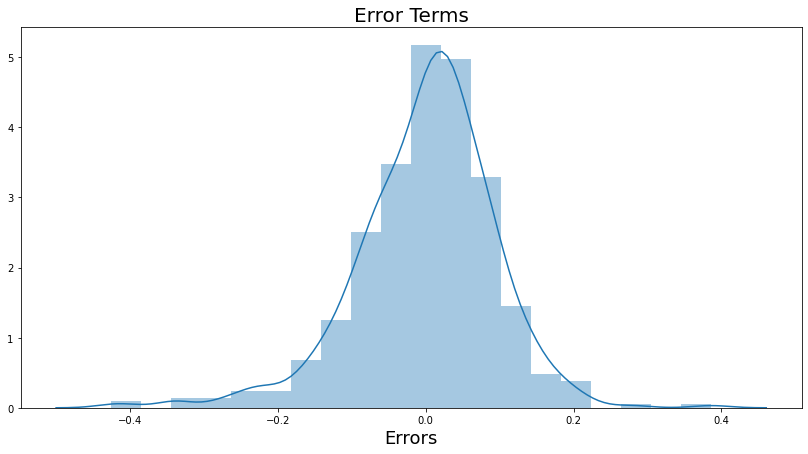

In [73]:
# Plotting the histogram for the error terms

fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)             
plt.xlabel('Errors', fontsize = 18) 
plt.show()

It can be observed that the Error terms are normally distributed.

# Making Predictions Using the Final Model

Applying the scaling on the test sets

In [74]:
#Create a list of numeric variables
num_vars=['temp','hum','windspeed','cnt']

#Fit on data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0.817246,0.314298,0.537414,0.569029


In [75]:
bike_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.254545,0.263636,0.236364,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.436599,0.441609,0.425817,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


### Dividing into X_test and y_test

In [76]:
#Dividing into X_test and y_test
y_test = bike_test.pop('cnt')
X_test = bike_test


In [77]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new5.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,July,Sep,Light Snow,Mist + Cloudy,spring,summer,winter,yr,holiday,temp
184,1.0,1,0,0,1,0,0,0,0,1,0.831783
535,1.0,0,0,0,0,0,1,0,1,0,0.901354
299,1.0,0,0,0,1,0,0,1,0,0,0.511964
221,1.0,0,0,0,0,0,0,0,0,0,0.881625
152,1.0,0,0,0,0,0,1,0,0,0,0.817246


In [78]:
# Making predictions
y_pred = lm5.predict(X_test_new1)

### Finding R-squared and Adjusted R-Squared for Test set

In [79]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8092660294132242

In [80]:
Adj_r2=1-(1-0.8115083)*(11-1)/(11-1-1)
print(Adj_r2)

0.7905647777777778


## Model Evaluation

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

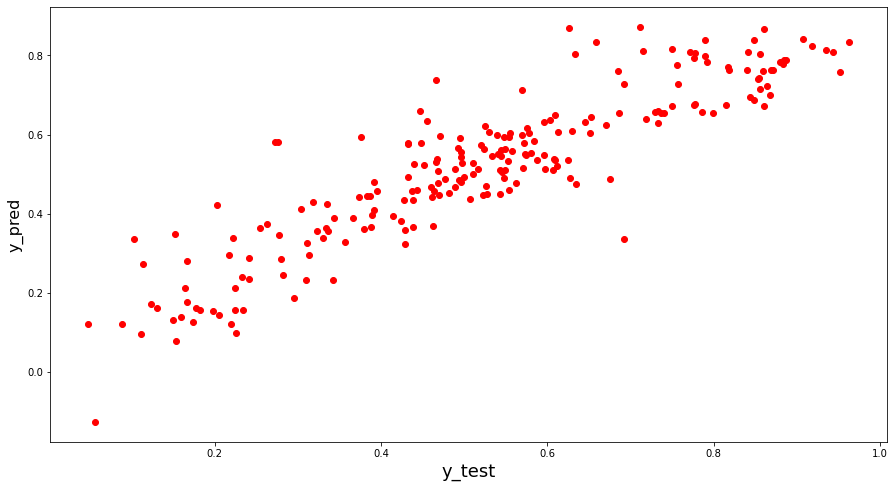

In [81]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='red')
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)                          

Visualising the fit on the test set

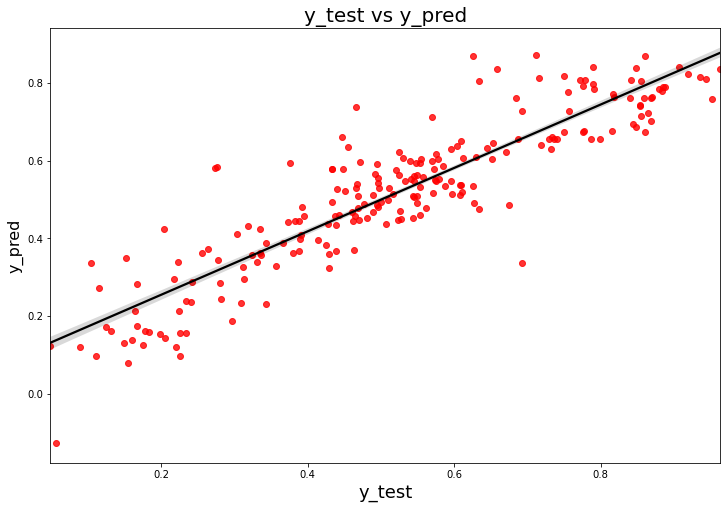

In [82]:
#Regression plot
plt.figure(figsize=(12,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "red"}, line_kws={"color": "black"})

plt.title('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)                         
plt.show()

We can see that the equation of our best fitted line is:

cnt=0.5029×temp+0.0812×Sep+0.0367×summer+0.0829×winter+0.2326×Year−0.2989×lightsnow−0.0785×mistcloudy−0.0766×spring-0.1003*holiday-0.0523*July

# Final Result Comparison between Train model and Test:¶

- Train R^2 : 0.824
- Train Adjusted R^2 : 0.820
- Test R^2: 0.80926
- Test Adjusted R^2: 0.790564
- Difference in R^2 between train and test: 1.5%
- Difference in adjusted R^2 between Train and test: 3% which is less than 5%

This model satisfies every parameter for being a good model.
The obtained R-squared value of 0.809 in the test data set. Thus, we could say that the predicted values from the model are able to explain 80.9% variation in the actual outcomes. This is a fairly decent model. 

# Interpretation:

- We are able to create a decent model for the the demand of shared bikes with the significant variable.
- We can see that temperature variable is having the highest coefficient of 0.5029, which means if the temperature increases by one unit the number of bike rentals increases by 0.5029 units.
- We also see there are some variables with negative coefficients, A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.
- We have lightsnow, mist+cloudy, spring, holiday, and july as negative coefficient which signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.

# Business Goals

- The US's bike-sharing provider BoomBikes can focus more on Temperature as it shows high positive relation with the rentals, so the company should make available of more number of bikes during rise in temperature.  
- We can see demand for bikes was more in 2019 than 2018, so just focus as there is increase in 2019 and might be facing dips in their revenues due to the ongoing Corona pandemic and by the time the pandamic get overs things will be better so they should prepare some plan to attract customers through promoting their bikes.
- Can focus more on Summer & Winter season, September month as they have good influence on bike rentals.
- We can see spring season, July month,holidays has negative coefficients and negatively correlated to bike rentals. So we can provide some discounts there to increase the demand.
- Now seeing to weathersit variable, we have got negative coefficients for Mist +cloudy and Lightsnow weather so we can give offers during that time to increase the rental.